[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/02B-data-sets-imagenet.ipynb)

# ImageNet Dataset

The ImageNet project is a large visual database for visual object recognition software research. The idea for this project was conceived over 15 years ago by AI researcher Fei-Fei Li. The ImageNet team presented their dataset for the first time in 2009.

Keras comes bundled with many pre-trained classification models. As of Keras version 2.11, there are 19 different pre-trained models available, where some versions contain many variants as well. The list of models can be found here. Here we will use the following pre-trained models to make predictions on several sample test images. 
- VGG16
- ResNet50
- InceptionV3
AI Image Recognition is the process of using artificial intelligence to identify and categorize objects within an image, a task that, while intuitive for humans, is complex for machines due to the significant processing power required. 

Here's a simple Jupyter Notebook exercise for students to perform image classification using a pre-trained model on the ImageNet dataset. This exercise will guide them through loading a pre-trained model, making predictions, and visualizing the results.


## Exercise: Image Classification with ImageNet

### Step 1: Setup
First, ensure you have the necessary libraries installed. You can install them using pip if you haven't already:


In [2]:
%pip install torch torchvision matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Mejkerslab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Step 2: Import Libraries

Import the required libraries for the exercise:



In [3]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import json

### Step 3: Load Pre-trained Model
Load a pre-trained model (e.g., ResNet-18) and set it to evaluation mode:



In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

model = models.resnet18(pretrained=True)
model.eval()

C:\Users\Mejkerslab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Mejkerslab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Step 4: Load and Preprocess Image
Load an image and apply the necessary transformations:

In [5]:
def preprocess_image(image_path):
    input_image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)
    return input_batch

import urllib.request

# Download a sample image
image_url = 'https://erasmus.tsp.edu.rs/wp-content/uploads/2024/12/rcd1024.jpg'  # Replace with a valid image URL
image_path = 'rcd1024.jpg'
urllib.request.urlretrieve(image_url, image_path)

input_batch = preprocess_image(image_path)

### Step 5: Make Predictions
Pass the preprocessed image through the model to get predictions:


In [6]:
with torch.no_grad():
    output = model(input_batch)


### Step 6: Decode Predictions
Download the ImageNet class labels and decode the predictions:



In [7]:
import urllib.request

# Download the labels file
labels_url = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
labels_path = 'imagenet-simple-labels.json'
urllib.request.urlretrieve(labels_url, labels_path)

# Load the labels
with open(labels_path) as f:
    labels = json.load(f)

# Get the predicted label
_, predicted_idx = torch.max(output, 1)
predicted_label = labels[predicted_idx.item()]

print(f'Predicted label: {predicted_label}')

Predicted label: power drill


Step 7: Visualize the Image and Prediction
Display the image along with the predicted label:



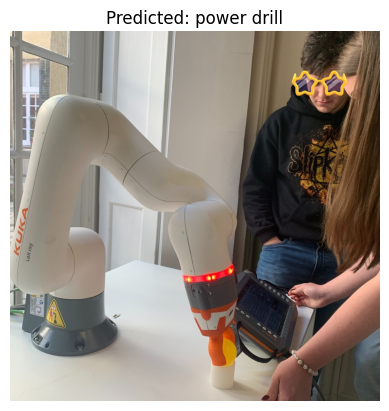

In [8]:
def show_image(image_path, label):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {label}')
    plt.axis('off')
    plt.show()

show_image(image_path, predicted_label)

### Instructions for Students
1. Follow the steps in the notebook to load and preprocess an image.
2. Use the pre-trained ResNet-18 model to make predictions.
3. Decode the predictions and display the image with the predicted label.
4. Experiment with different images and observe the model's performance.


